<a href="https://colab.research.google.com/github/Allen-John-Manoj/Fashion-MNIST-CNN/blob/main/MNIST_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install tensorflow

In [ ]:
#TF_ENABLE_ONEDNN_OPTS=1
#pip install intel-tensorflow

The above can only be run in Intel openAPI Jupyter notebook. Recommended for faster and better results

In [ ]:
import tensorflow as tf

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

import numpy as num
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.utils.multiclass import unique_labels

In [ ]:
(train, trainlabel), (test, testlabel) = tf.keras.datasets.fashion_mnist.load_data()

train = train.astype('float32') / 255.0
test = test.astype('float32') / 255.0

train = num.expand_dims(train, -1)
test = num.expand_dims(test, -1)

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
cnn = tf.keras.models.Sequential()

cnn.add(Conv2D(
           filters=64,
            kernel_size=(5, 5),
           padding='same',
            activation='relu',
            kernel_regularizer=l2(0.01),
           input_shape=(28, 28, 1)))

cnn.add(MaxPooling2D( pool_size=(2, 2), strides=(2, 2)))

cnn.add(BatchNormalization(momentum=0.9))

cnn.add(Conv2D(
           filters=128,
            kernel_size=(3, 3),
            padding='same',
            activation='relu',
            input_shape=(28, 28, 1)))

cnn.add(MaxPooling2D( pool_size=(2, 2)))

#cnn.add(BatchNormalization(momentum=0.9))

cnn.add(Conv2D(
           filters=256,
            kernel_size=(2, 2),
            padding='same',
            activation='relu',
            input_shape=(28, 28, 1)))

cnn.add(MaxPooling2D( pool_size=(2, 2)))


cnn.add(Dropout( rate=0.25 ))

cnn.add(Flatten())

cnn.add(Dense(
        units=256, activation='relu'))

cnn.add(Dense(
       units=100, activation='relu'))

cnn.add(Dense(
        units=10, activation='softmax'))

In [ ]:
cnn.compile(optimizer=Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['sparse_categorical_accuracy'])

cnn.summary()
cnn.save("Model.pb")

#from google.colab import files

#files.download("Model.pb")

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 64)        1664      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 batch_normalization_1 (Batc  (None, 14, 14, 64)       256       
 hNormalization)                                                 
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                             
                                                      

In [ ]:
history = cnn.fit(
            train, trainlabel,
            #steps_per_epoch = 200,
            batch_size=356,
            epochs=10,
            validation_split=0.2)

test_loss, test_accuracy = cnn.evaluate(test, testlabel, verbose=0)

print(f'\nTest loss: {test_loss:.4f}')
print(f'Test accuracy: {test_accuracy:.4f}')

Epoch 1/10
135/135 [==============================] - 352s 3s/step - loss: 0.5554 - sparse_categorical_accuracy: 0.8071 - val_loss: 0.3489 - val_sparse_categorical_accuracy: 0.8803
Epoch 2/10
135/135 [==============================] - 302s 2s/step - loss: 0.3285 - sparse_categorical_accuracy: 0.8854 - val_loss: 0.3500 - val_sparse_categorical_accuracy: 0.8712
Epoch 3/10
135/135 [==============================] - 308s 2s/step - loss: 0.2893 - sparse_categorical_accuracy: 0.8997 - val_loss: 0.2946 - val_sparse_categorical_accuracy: 0.8987
Epoch 4/10
135/135 [==============================] - 280s 2s/step - loss: 0.2583 - sparse_categorical_accuracy: 0.9099 - val_loss: 0.2864 - val_sparse_categorical_accuracy: 0.8992
Epoch 5/10
135/135 [==============================] - 255s 2s/step - loss: 0.2384 - sparse_categorical_accuracy: 0.9166 - val_loss: 0.2643 - val_sparse_categorical_accuracy: 0.9073
Epoch 6/10
135/135 [==============================] - 255s 2s/step - loss: 0.2190 - sparse_cate

313/313 [==============================] - 13s 41ms/step
Accuracy: 99.99999403953552
              precision    recall  f1-score   support

           0       0.90      0.82      0.86      1000
           1       0.99      0.98      0.99      1000
           2       0.87      0.87      0.87      1000
           3       0.94      0.90      0.92      1000
           4       0.81      0.91      0.85      1000
           5       0.98      0.98      0.98      1000
           6       0.74      0.76      0.75      1000
           7       0.96      0.97      0.97      1000
           8       0.99      0.98      0.98      1000
           9       0.97      0.97      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.92      0.91      0.91     10000
weighted avg       0.92      0.91      0.91     10000



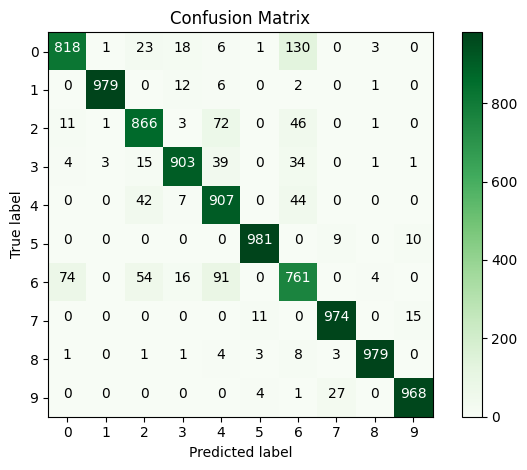

In [ ]:
predictions = cnn.predict(test)
print(f"Accuracy: {num.max(predictions)*100}")
pred = num.argmax(predictions, axis=1)
cm = confusion_matrix(testlabel, pred)
classes = unique_labels(testlabel, pred)

plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Greens)
plt.title('Confusion Matrix')
plt.colorbar()

report = classification_report(testlabel, pred)
print(report)

tick_marks = num.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()

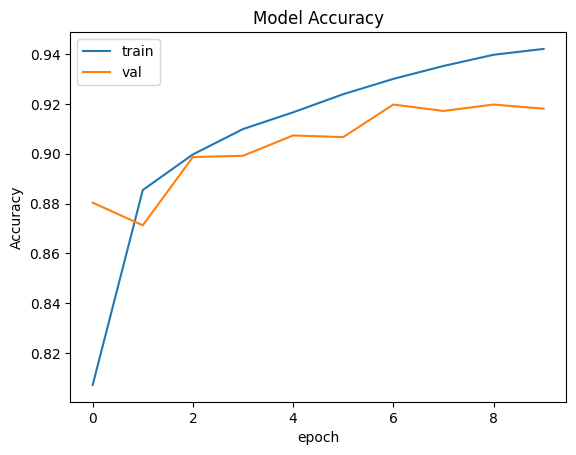

In [ ]:
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

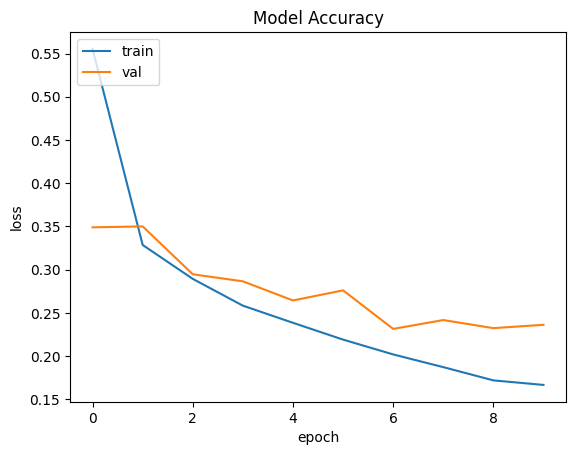

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
model = tf.keras.models.load_model('Model.h5')
tf.saved_model.save(model,'Final.pb')

In [ ]:
!python -m venv openvino_env

Error: Command '['/content/openvino_env/bin/python3', '-m', 'ensurepip', '--upgrade', '--default-pip']' returned non-zero exit status 1.


In [ ]:
pip install openvino-dev==2023.0.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 40.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 76.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.8/36.8 MB 16.4 MB/s eta 0:00:00
  Created wheel for jstyleson: filename=jstyleson-0.0.2-py3-none-any.whl size=2384 sha256=3dcf0a0971ce8e13f4524d1644f6ee6797c511189f2511a1a287e40f0f9a22c6
  Stored in directory: /root/.cache/pip/wheels/12/51/c6/a1e751db88203e11c6d9ffe4683ca3d8c14b1479639bec1006
Successfully built jstyleson
  Attempting uninstall: networkx
    Found existing installation: networkx 3.1
    Uninstalling networkx-3.1:
      Successfully uninstalled networkx-3.1


In [ ]:
from openvino.tools.mo import convert_model
ov_model = convert_model('Final.pb')

In [ ]:
import shutil

# Specify the folder path
folder_path = '/content/Final.pb'

# Specify the destination zip file path
zip_file_path = '/content/openVINO_model'

# Create a zip file
shutil.make_archive(zip_file_path, 'zip', folder_path)


'/content/openVINO_model.zip'

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# Move the zip file to Google Drive
destination_path = '/content/drive/MyDrive/openVINO_model'
shutil.move(zip_file_path + '.zip', destination_path)


'/content/drive/MyDrive/openVINO_model'